In [14]:
import os, shutil

original_dataset_dir = '/Users/yzq/Desktop/all/train'

base_dir = '/Users/yzq/Desktop/all/cats_and_dogs_small'
os.makedirs(base_dir, exist_ok=True)

train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir, exist_ok=True)
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir, exist_ok=True)

train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir, exist_ok=True)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir, exist_ok=True)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir, exist_ok=True)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir, exist_ok=True)

test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir, exist_ok=True)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir, exist_ok=True)


In [15]:
fnames = ['cat.{}.jpg'.format(i)for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('total trainning cat images:', len(os.listdir(train_cats_dir)))
print('total trainning dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total trainning cat images: 1000
total trainning dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 15, 15, 128)      

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen = ImageDataGenerator(rescale= 1./255)
validation_datagen = ImageDataGenerator(rescale= 1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size = 20, class_mode = 'binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print('label content:', labels_batch)
    break;

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
label content: [1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0.]


In [31]:
history = model.fit(train_generator, steps_per_epoch = 100, epochs=10, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_small_2.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/10
100/100 [==============================] - 64s 638ms/step - loss: 0.6127 - acc: 0.6670 - val_loss: 0.6229 - val_acc: 0.6370
Epoch 2/10
100/100 [==============================] - 67s 668ms/step - loss: 0.5680 - acc: 0.6975 - val_loss: 0.6060 - val_acc: 0.6700
Epoch 3/10
100/100 [==============================] - 63s 629ms/step - loss: 0.5297 - acc: 0.7270 - val_loss: 0.5917 - val_acc: 0.6830
Epoch 4/10
100/100 [==============================] - 65s 647ms/step - loss: 0.5010 - acc: 0.7535 - val_loss: 0.5829 - val_acc: 0.6950
Epoch 5/10
100/100 [==============================] - 66s 664ms/step - loss: 0.4804 - acc: 0.7615 - val_loss: 0.5979 - val_acc: 0.6740
Epoch 6/10
100/100 [==============================] - 69s 691ms/step - loss: 0.4495 - acc: 0.7870 - val_loss: 0.6099 - val_acc: 0.6790
Epoch 7/10
100/100 [==============================] - 63s 627ms/step - loss: 0.4266 - acc: 0.7925

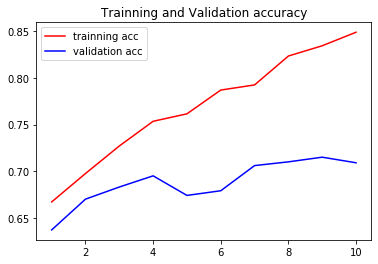

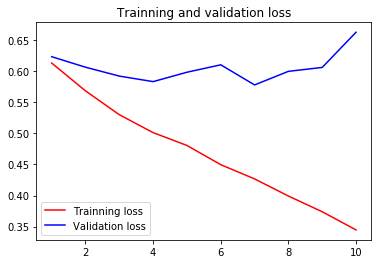

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# correct
plt.plot(epochs, acc, 'r', label='trainning acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Trainning and Validation accuracy')
plt.legend()
plt.show()

# error rate
plt.plot(epochs, loss, 'r', label = 'Trainning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Trainning and validation loss')
plt.legend()
plt.show()

In [37]:
datagen = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,
                            shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, fill_mode = 'nearest')

In [46]:
from tensorflow.keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
#选择一张猫的照片
img_path = fnames[3]
#加载图片并把它设置为150*150
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
print(x.shape)
x = x.reshape((1, ) + x.shape)
print(x.shape)


(150, 150, 3)
(1, 150, 150, 3)


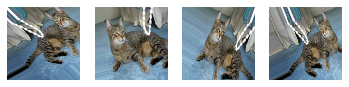

In [58]:

i = 0
f, ax = plt.subplots(1, 4)
for batch in datagen.flow(x, batch_size = 1):
    imgplot = ax[i].imshow(image.array_to_img(batch[0]))
    ax[i].axis('off')
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

In [59]:
model = models.Sequential()
#输入图片大小是150*150 3表示图片像素用(R,G,B)表示
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150 , 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
#把上层网络的输出结果中的一半数据随机清零
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [60]:
train_datagen = ImageDataGenerator(rescale = 1./ 255, rotation_range=40, 
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                  ) #把像素点的值除以255，使之在0到1之间,增加图片变换
test_datagen = ImageDataGenerator(rescale = 1. / 255)

#generator 实际上是将数据批量读入内存，使得代码能以for in 的方式去方便的访问
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                   batch_size=20,class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, 
                                                        target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [61]:
history2 = model.fit_generator(train_generator, steps_per_epoch = 100,
                             epochs = 8, validation_data = validation_generator,
                             validation_steps = 50)
model.save('cats_and_dogs_small_2.h5')

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/8
100/100 [==============================] - 95s 948ms/step - loss: 0.6898 - acc: 0.5340 - val_loss: 0.6822 - val_acc: 0.5760
Epoch 2/8
100/100 [==============================] - 74s 736ms/step - loss: 0.6852 - acc: 0.5570 - val_loss: 0.6712 - val_acc: 0.5670
Epoch 3/8
100/100 [==============================] - 82s 824ms/step - loss: 0.6797 - acc: 0.5710 - val_loss: 0.6550 - val_acc: 0.6200
Epoch 4/8
100/100 [==============================] - 79s 789ms/step - loss: 0.6691 - acc: 0.5795 - val_loss: 0.6401 - val_acc: 0.6260
Epoch 5/8
100/100 [==============================] - 66s 658ms/step - loss: 0.6579 - acc: 0.6045 - val_loss: 0.6248 - val_acc: 0.6440
Epoch 6/8
100/100 [==============================] - 64s 644ms/step - loss: 0.6382 - acc: 0.6350 - val_loss: 0.6111 - val_acc: 0.6560
Epoch 7/8
100/100 [==============================] - 64s 643ms/step - loss: 0.6331 - acc: 0.6435 - val_

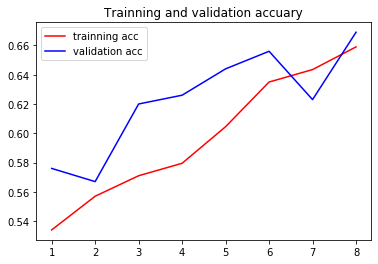

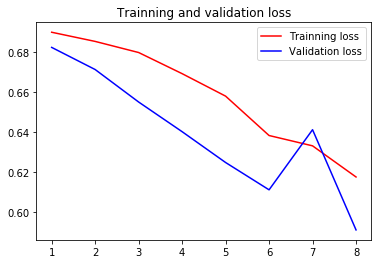

In [62]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

#绘制模型对训练数据和校验数据判断的准确率
plt.plot(epochs, acc, 'r', label = 'trainning acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Trainning and validation accuary')
plt.legend()

plt.show()
plt.figure()

#绘制模型对训练数据和校验数据判断的错误率
plt.plot(epochs, loss, 'r', label = 'Trainning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Trainning and validation loss')
plt.legend()

plt.show()